In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [87]:
dfx=pd.read_csv('Train.csv')
dfx.head()


,feature_1,feature_2,feature_3,feature_4,feature_5,target
0,0.293416,-0.945599,-0.421105,0.406816,0.525662,-82.154667
1,-0.836084,-0.189228,-0.776403,-1.053831,0.597997,-48.897960
2,0.236425,0.132836,-0.147723,0.699854,-0.187364,77.270371
3,0.175312,0.143194,-0.581111,-0.122107,-1.292168,-2.988581
4,-1.693011,0.542712,-2.798729,-0.686723,1.244077,-37.596722


In [88]:
X=dfx.values
Y=X[:,-1]
X=X[:,:-1]
print(X.shape,Y.shape)

(1600, 5) (1600,)


In [89]:
#Normalise

mean=np.mean(X,axis=0)
std=np.std(X,axis=0)

X=(X-mean)/std

In [90]:
ones=np.ones((X.shape[0],1))
X=np.hstack((ones,X))


print(X.shape)
print(X)
print(Y)

(1600, 6)
[[ 1.          0.29016495 -0.89871183 -0.37238147  0.44177059  0.52502448]
 [ 1.         -0.84270473 -0.15822922 -0.72365639 -0.99464217  0.59896038]
 [ 1.          0.23300381  0.15706968 -0.10209444  0.72994655 -0.20378187]
 ...
 [ 1.          1.0431652  -0.8532941   1.75476416 -1.79830858  0.44004223]
 [ 1.         -1.27708547  0.02207793  1.88059294 -1.0207355   0.74035908]
 [ 1.         -1.89374689 -0.80456069 -1.39187219  0.52221049  1.47960738]]
[ -82.15466656  -48.89796018   77.2703707  ... -107.51050797  -47.34155781
 -115.93900296]


In [91]:
t=np.zeros((X.shape[1]))
print(t)

[0. 0. 0. 0. 0. 0.]


In [92]:
def hypothesis(X,theta):
    return np.dot(X,theta)

def error(X,Y,theta):
    e=0.0
    y_=hypothesis(X,theta)
    e=np.sum((y_-Y)**2)
    
    return e/X.shape[0]

def gradient(X,Y,theta):
    
    y_=hypothesis(X,theta)
    grad=np.dot(X.T,(y_-Y))
    
    return grad/X.shape[0]

def gradient_Descent(X,Y,learning_rate=0.1,max_step=300):
    
    theta=np.zeros((X.shape[1],))
    error_list=[]
    
    for i in range(max_step):
        grad=gradient(X,Y,theta)
        e=error(X,Y,theta)
        error_list.append(e)
        theta=theta-learning_rate*grad
        
    return theta,error_list   
    
    
    
    

    
    

In [93]:
def mini_batch_gradient_descent(X,y,batch_size=200,learning_rate=0.1,max_itrs=300):
    n = X.shape[1]
    theta = np.zeros((n,))
    error_list = []
    
    data=np.hstack((X,y.reshape(-1,1)))
    for i in range(max_itrs):
        e = error(X,y,theta)
        error_list.append(e)
        
        #Mini Btach Gradient descent
        np.random.shuffle(data)
        m=data.shape[0]
        total_batches=m//batch_size
        
        for i in range(total_batches):
            batch_data=data[i*batch_size:(i+1)*batch_size,:]
            
            x_batch=batch_data[:,:-1]
            y_batch=batch_data[:,-1]
            
            batch_grad=gradient(x_batch,y_batch,theta)
            theta=theta-learning_rate*batch_grad
            e = error(x_batch,y_batch,theta)
            error_list.append(e)
            
            
            
        
    return theta,error_list 
            


In [94]:
theta,errorlist=gradient_Descent(X,Y)
Mini_Batch_theta,error_list_mini=mini_batch_gradient_descent(X,Y)

In [95]:
print(theta)
print(Mini_Batch_theta)

[ 0.31883538 29.59359198 94.65067706  8.37544469 45.52303635  2.46461552]
[ 0.22583749 29.67821281 94.64060822  8.41213616 45.52221692  2.53298577]


In [96]:
print(error_list_mini)

[12256.130414032896, 9700.992639671716, 7935.969209837315, 7279.22127096568, 5721.870740788469, 4648.2757146810145, 3598.6266776292123, 3018.9902439997195, 2708.8970197725434, 2644.490209185495, 2253.7592731932637, 2073.135251089281, 1424.4285601658112, 1354.1133139854203, 1282.8164834054644, 1015.1425440904577, 931.2874162383308, 741.8261877692235, 840.1769219883063, 805.5128309339175, 738.666011363931, 591.2782096255211, 530.6704822677048, 639.441010398629, 548.402897852379, 479.68461760380757, 470.8167443215892, 497.49019418248093, 489.1098582555091, 478.681127844404, 505.71207280857334, 441.3873632334739, 454.4202614191778, 404.6758951085366, 427.42352953629785, 393.5444895708482, 430.74894265925934, 410.73482023660966, 415.25022106141654, 382.7021499734513, 365.26219190019197, 424.36788057198385, 401.82441013765623, 525.5145728754161, 440.93498152499524, 418.3450840463527, 410.8369129666623, 339.26172732827763, 413.6403290443102, 471.8350357496283, 481.389118057304, 456.6115147499

<IPython.core.display.Javascript object>


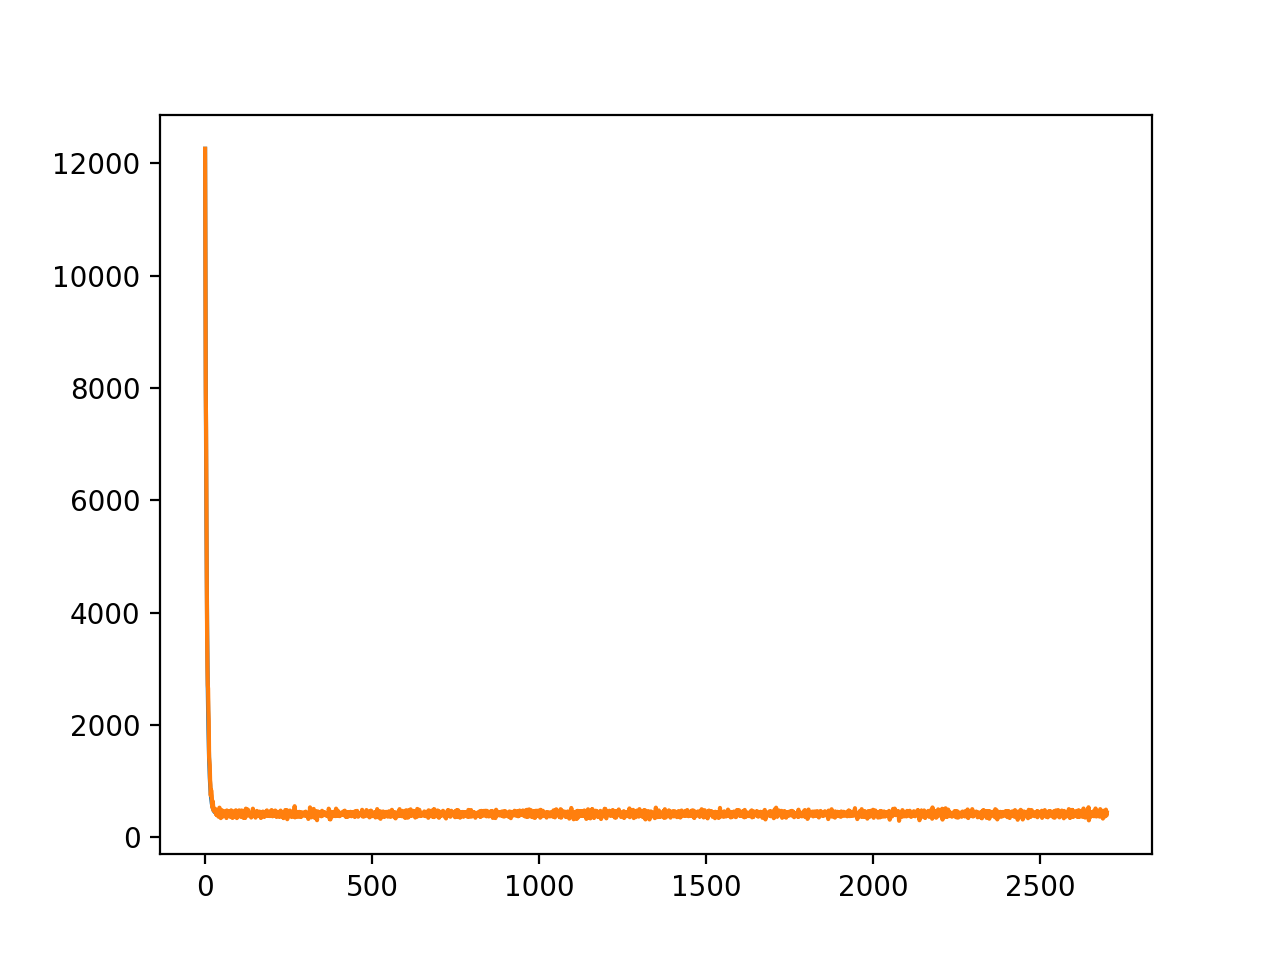

In [97]:
plt.plot(errorlist)
plt.show()

<IPython.core.display.Javascript object>


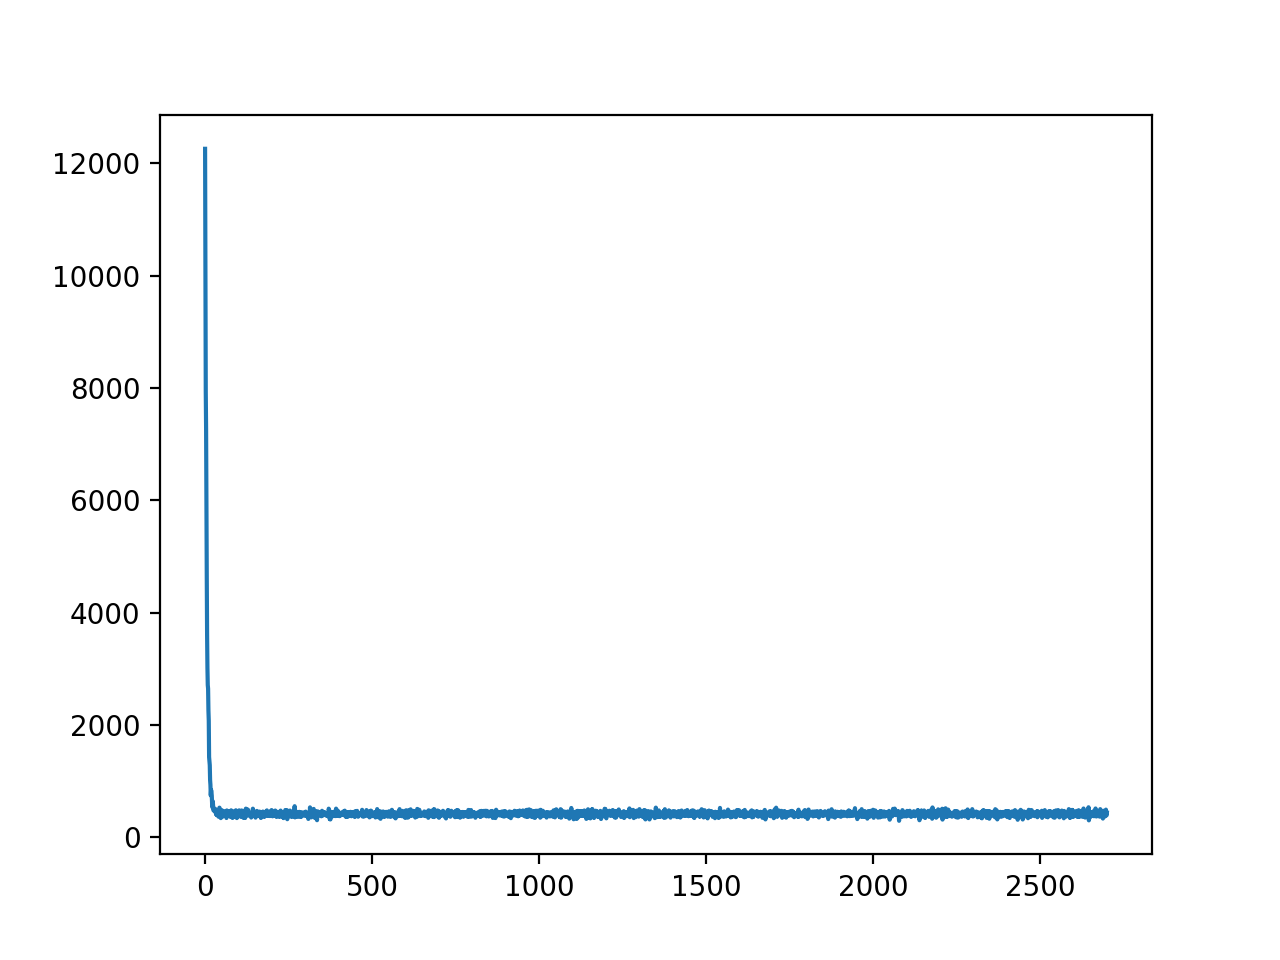

In [100]:
plt.plot(error_list_mini)
plt.show()

In [99]:
y_=[]
m=X.shape[0]
for i in range(m):
    pred=hypothesis(X[i],theta)
    y_.append(pred)
    
    
y_=np.array(y_)   

In [36]:
def r2_score(y,y_):
    num = np.sum((y-y_)**2)
    denom = np.sum((y- y.mean())**2)
    score = (1- num/denom)
    return score*100

In [37]:
r2_score(Y,y_)

96.60939669975616

In [133]:
test=pd.read_csv('Test/Test.csv')
test.head()

,feature_1,feature_2,feature_3,feature_4,feature_5
0,1.015254,2.076209,-0.266435,-2.418088,-0.980503
1,-0.375021,0.953185,0.626719,0.704406,-0.355489
2,-1.024452,0.962991,-0.407942,-1.861274,0.455201
3,-2.489841,0.544802,0.601219,-0.607021,-1.314286
4,-0.384675,-0.833624,1.358552,-0.547932,0.411925


In [134]:
test=test.values
print(test)

[[ 1.01525387e+00  2.07620944e+00 -2.66434820e-01 -2.41808820e+00
  -9.80502790e-01]
 [-3.75021204e-01  9.53184528e-01  6.26719138e-01  7.04405750e-01
  -3.55489211e-01]
 [-1.02445225e+00  9.62991107e-01 -4.07942004e-01 -1.86127383e+00
   4.55201351e-01]
 ...
 [ 5.54727647e-01  1.76824345e+00 -8.97787210e-01 -1.19366107e+00
   3.40563374e-01]
 [-1.62717246e+00  8.56470994e-01 -5.65729519e-04  6.29386649e-01
   4.53382144e-01]
 [ 1.39310499e-01  5.31597186e-01 -8.53107053e-01  3.16920076e-02
   1.71489304e+00]]


In [135]:
mean=np.mean(test,axis=0)
std=np.std(test,axis=0)
test=(test-mean)/std

In [136]:
ones=np.ones((test.shape[0],1))
test=np.hstack((ones,test))
print(test.shape)

(400, 6)


In [137]:
print(test)

[[ 1.          1.06045325  2.04744832 -0.24549091 -2.30661408 -1.08034112]
 [ 1.         -0.36118497  0.94676928  0.61285352  0.71550489 -0.41280281]
 [ 1.         -1.02526649  0.95638073 -0.38148304 -1.76769893  0.45304559]
 ...
 [ 1.          0.58953804  1.74561022 -0.85223715 -1.1215471   0.33060786]
 [ 1.         -1.64158344  0.85198015  0.01001627  0.64289734  0.4511026 ]
 [ 1.          0.16474952  0.53357066 -0.80929835  0.06441606  1.79844429]]


In [138]:
y_=hypothesis(test,Mini_Batch_theta)

In [139]:
sub=pd.DataFrame(data=y_,columns=['target'])

In [140]:
sub.head()

,target
0,115.666172
1,115.790487
2,-22.220889
3,-46.850031
4,-97.426445


In [141]:
sub.to_csv('air_quality_submisssion.csv',index_label='Id')